In [1]:
data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Annual Income': [15,16,17,18,19,20,21,22,23,24],
    'Spending Score': [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)
print(df)


   CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72


In [2]:
X = df[['Annual Income', 'Spending Score']]


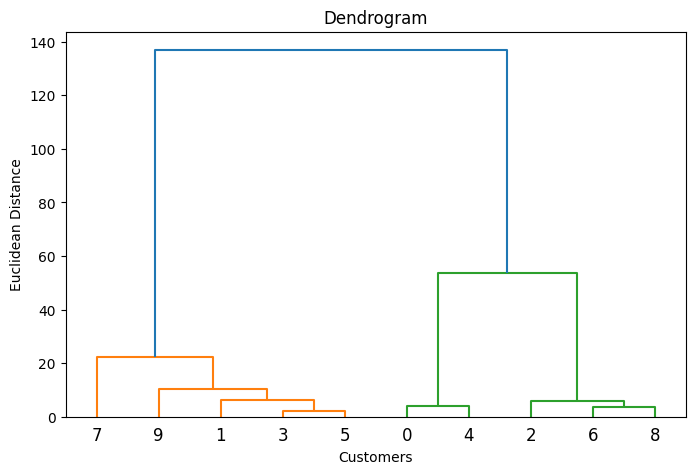

In [3]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

df['Cluster'] = y_hc
print(df)


   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0


In [ ]:
'''| Cluster | Annual Income (approx) | Spending Score (approx) | Interpretation                                                        |
| ------- | ---------------------- | ----------------------- | --------------------------------------------------------------------- |
| 0       | 15–18                  | low (3–6)               | Low income, low spenders → may need promotions to boost sales         |
| 1       | 20–24                  | high (70–94)            | Higher income, high spenders → target them with premium products      |
| 2       | 17–19                  | medium (\~39–40)        | Mid-income, average spending → could be nurtured into loyal customers |
'''